# 1. Import library pandas dan Decision Tree

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# 2. Library untuk visualisasi di Python

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Import loan_data.csv.

- Identifikasi tipe data dari masing-masing variable.
- Tampilkan 5 baris pertama dan tampilkan informasi summary statistics-nya.

In [3]:
#Import data
df = pd.read_csv('loan_data.csv')

In [4]:
#tipe data setiap features
df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [5]:
#bisa juga menggunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


- dari informasi diatas dapat dilihat bahwa ada 13 kolom yang tipe datanya numerikal dan 1 yang tipe datanya object atau kategorikal.

In [6]:
#5 baris pertama
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [7]:
#summary statistics
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# 4. Lakukan pengecekan missing data dan duplicated-row.
- Jika ada, sebutkan kolom apa yang ada missing data.
- Apakah ada duplicated-row?

In [8]:
#pengecekan missing values
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

- Ternyata data tidak ada yang missing.

In [9]:
#cari cek data yang duplicate
df[df.duplicated()==True]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid


- tidak ada data yang duplikat

# 5. Lakukan pengecekan variabel target.
- Ada berapa kategori pada variable target?
- Berapa proporsinya?
- Lakukan visualisasi yang menunjukkan PROPORSI kelas target.
***

- Kolom target adalah not fully paid
- not_fully_paid: indicates whether the loan was not paid back in full (the borrower either defaulted or the borrower was deemed unlikely to pay it back).

In [10]:
#kategori di variabel target
df['not.fully.paid'].unique()

#ada dua kategori yaitu 0 dan 1

array([0, 1], dtype=int64)

Positive examples = 8045
Negative examples = 1533


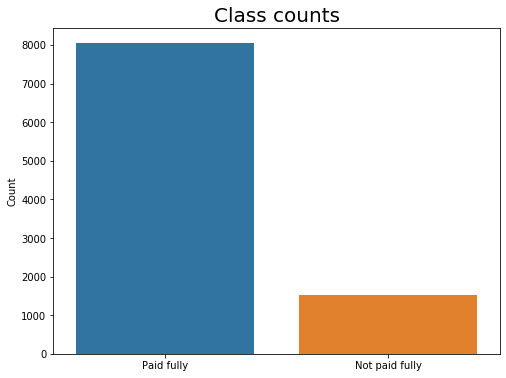

In [11]:
#cari data yang positive dan negative
#dan juga proporsinya
neg = df[df["not.fully.paid"] == 1].shape[0]
pos = df[df["not.fully.paid"] == 0].shape[0]
print(f"Positive examples = {pos}")
print(f"Negative examples = {neg}")

#visualisasi
plt.figure(figsize=(8, 6))
sns.countplot(df["not.fully.paid"])
plt.xticks((0, 1), ["Paid fully", "Not paid fully"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts", y=1, fontdict={"fontsize": 20});

F:\Anaconda\envs\pandas\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


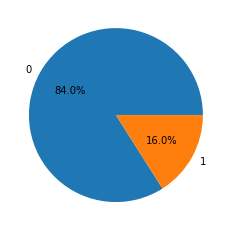

In [12]:
pie = pd.DataFrame(df['not.fully.paid'].value_counts())
plt.pie(pie, autopct='%1.1f%%', labels=pie.index)
plt.show()

- Proporsi yang 0 merupakan yang paid fully sebesar 84%
- sedangkan yang 1 yang not paid fully sebesar 16%.

# 6. Berapa variansi (ragam) nilai installment?

In [13]:
df['installment'].var()

42878.52390484519

- variansi dari installment adalah 42878

# 7. Berapa nilai simpangan kuartil pada variable ‘installment’?

In [14]:
q1 = df['installment'].quantile(0.25)
q3 = df['installment'].quantile(0.75)
print(q3-q1)

268.99249999999995


- nilai simpangan kuartil adalah sebesar 268

# 8. Berapa nilai installment tertinggi untuk masing-masing tujuan pinjaman (masing-masing kategori pada variable ‘purpose’)?

In [15]:
pd.DataFrame(df.groupby(df['purpose'])['installment'].max())

,installment
purpose,
all_other,916.95
credit_card,922.42
debt_consolidation,940.14
educational,861.88
home_improvement,902.06
major_purchase,898.55
small_business,926.83


# 9. Variable ‘purpose’ menunjukkan tujuan pengajuan pinjaman.
- Ada berapa kategori pada variable tersebut?
- Visualisasikan frekuensi pinjaman berdasarkan tujuannya, diurutkan dari frekuensi tertinggi.

In [16]:
# kategori setiap purpose
print(df['purpose'].unique())
print(df['purpose'].nunique())

#ada 7 kategoru

['debt_consolidation' 'credit_card' 'all_other' 'home_improvement'
 'small_business' 'major_purchase' 'educational']
7


- ada 7 kategori yaitu 'debt_consolidation' 'credit_card' 'all_other' 'home_improvement' 'small_business' 'major_purchase' 'educational'

In [17]:
df['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [18]:
a = pd.DataFrame(df['purpose'].value_counts()).reset_index()
a

,index,purpose
0,debt_consolidation,3957
1,all_other,2331
2,credit_card,1262
3,home_improvement,629
4,small_business,619
5,major_purchase,437
6,educational,343


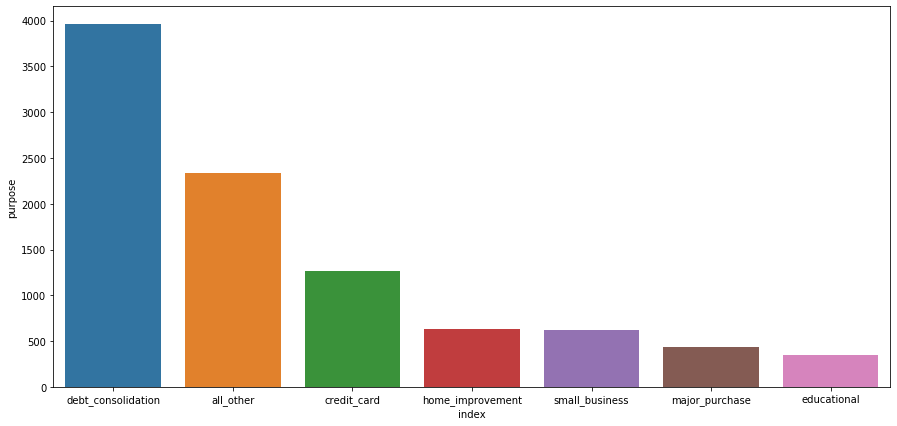

In [19]:
plt.figure(figsize=(15,7))
sns.barplot(x=a['index'], y=a['purpose'])

# 10. Apakah variable ‘fico’ merupakan predictor yang potensial untuk memprediksi target? Jelaskan argumen anda.
- Hint: Visualisasikan distribusi ‘fico’ terhadap target.

In [20]:
df.corr().style.background_gradient().set_precision(2)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1,-0.29,0.059,0.035,-0.091,0.35,0.099,-0.19,-0.1,-0.54,-0.076,-0.054,-0.16
int.rate,-0.29,1,0.28,0.056,0.22,-0.71,-0.12,0.093,0.46,0.2,0.16,0.098,0.16
installment,0.059,0.28,1,0.45,0.05,0.086,0.18,0.23,0.081,-0.01,-0.0044,-0.033,0.05
log.annual.inc,0.035,0.056,0.45,1,-0.054,0.11,0.34,0.37,0.055,0.029,0.029,0.017,-0.033
dti,-0.091,0.22,0.05,-0.054,1,-0.24,0.06,0.19,0.34,0.029,-0.022,0.0062,0.037
fico,0.35,-0.71,0.086,0.11,-0.24,1,0.26,-0.016,-0.54,-0.19,-0.22,-0.15,-0.15
days.with.cr.line,0.099,-0.12,0.18,0.34,0.06,0.26,1,0.23,-0.024,-0.042,0.081,0.072,-0.029
revol.bal,-0.19,0.093,0.23,0.37,0.19,-0.016,0.23,1,0.2,0.022,-0.033,-0.031,0.054
revol.util,-0.1,0.46,0.081,0.055,0.34,-0.54,-0.024,0.2,1,-0.014,-0.043,0.067,0.082
inq.last.6mths,-0.54,0.2,-0.01,0.029,0.029,-0.19,-0.042,0.022,-0.014,1,0.021,0.073,0.15


In [21]:
df.corr()['fico']

credit.policy        0.348319
int.rate            -0.714821
installment          0.086039
log.annual.inc       0.114576
dti                 -0.241191
fico                 1.000000
days.with.cr.line    0.263880
revol.bal           -0.015553
revol.util          -0.541289
inq.last.6mths      -0.185293
delinq.2yrs         -0.216340
pub.rec             -0.147592
not.fully.paid      -0.149666
Name: fico, dtype: float64

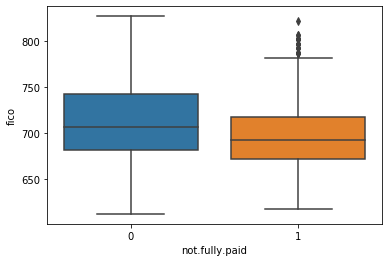

In [22]:
sns.boxplot(y=df['fico'], x=df['not.fully.paid']);

- Dari correlation plot diatas dapat ditarik kesimpulan bahwa fico dan target yaitu not fully paid memiliki korelasi linear negatif yang lemah yaitu hanya -0.14.
- dan juga dari boxplot diatas dapat dilihat bahwa boxplot 0 dan 1 hampir memiliki ciri-ciri yang sama.
- sehingga berdasarkan dua pernyataan diatas saya berpendapat bahwa fico bukan merupakan prediktor yang potensial untuk target.

# 11.Apakah variable ‘purpose’ merupakan predictor yang potensial untuk memprediksi target? Jelaskan argumen anda.
- Hint: Visualisasikan proporsi setiap kategori dalam variable ‘purpose’ terhadap target. Fungsi pd.crosstab akan membantu.

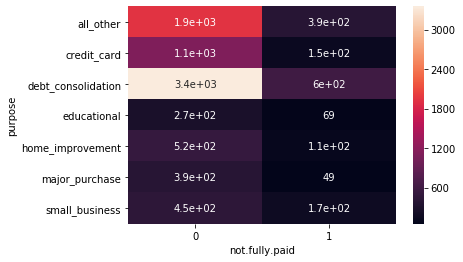

In [23]:
sns.heatmap(pd.crosstab(df['purpose'], df['not.fully.paid']), annot=True)

- dari heatmap diatas dapat dilihat bahwa untuk kategori 0 dan 1 dalam target memiliki warna yang berbeda.
- ambil contoh yang all other, di kategori 0 dia berwarna pink yang berarti jumlahnya banyak sedangkan untuk yang kategori 1 berwarna ungu yang jumlahnya sedikit.
- jadi menurut saya, features purpose merupakan predictor yang potensial.

# 12. Berapa nilai rata-rata dari int.rate untuk purpose dengan kategori ‘credit_card’?

In [24]:
df.groupby(df['purpose'])['int.rate'].mean()['credit_card']

0.11973819334389857

- nilai rata rata int.rate untuk features purpose dengan kategori credit_card adalah 0.1197

# 13. Berapa jumlah kasus pinjaman yang nilai installment-nya di atas 200 dan tujuan pinjamannya untuk pendidikan (educational) ?

In [25]:
len(df[(df['installment'] > 200) & (df['purpose']=='educational')])

137

- ada 137 kasus dengan ciri ciri installment diatas 200 dan tujuan peminjamanya pendidikan

# 14. Tuliskan script untuk memfilter purpose =’credit_card’ dan simpan dalam dataframe yang disebut loans3.

In [26]:
loans3 = df[df['purpose']=='credit_card']
loans3.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
17,1,credit_card,0.0894,476.58,11.608236,7.07,797,6510.958333,7586,52.7,1,0,0,0
22,1,credit_card,0.1355,339.60,11.512925,7.94,662,1939.958333,21162,57.7,0,0,0,0


In [27]:
loans3['purpose'].unique()

array(['credit_card'], dtype=object)

In [28]:
len(loans3)

1262

# 15. Siapkan data untuk pemodelan.
- Ubah data kategorik menjadi dummy variabel.
- Buat dataframe baru bernama ‘final_data’ yang berisi seluruh features (numerik dan kategorik) dengan peubah kategorik yang sudah diubah menjadi dummy variabel.

In [29]:
df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [30]:
#mengubah data purpose menjadi kategorikal
#dengan menggunakan get_dummies
final_data = pd.get_dummies(df)
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [31]:
#checking lagi
#data sudah numerikal semua
final_data.dtypes

credit.policy                   int64
int.rate                      float64
installment                   float64
log.annual.inc                float64
dti                           float64
fico                            int64
days.with.cr.line             float64
revol.bal                       int64
revol.util                    float64
inq.last.6mths                  int64
delinq.2yrs                     int64
pub.rec                         int64
not.fully.paid                  int64
purpose_all_other               uint8
purpose_credit_card             uint8
purpose_debt_consolidation      uint8
purpose_educational             uint8
purpose_home_improvement        uint8
purpose_major_purchase          uint8
purpose_small_business          uint8
dtype: object

# 16. Split final_data yang didapatkan dari soal sebelumnya menjadi data train dan data test. Proporsi data test adalah 0.30. Gunakan random_state = 101.

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x = final_data.drop(columns=['not.fully.paid'])
y = final_data['not.fully.paid']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [35]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6704, 19)
(6704,)
(2874, 19)
(2874,)


# 17. Buatlah sebuah instance DecisionTreeClassifier yang disebut ‘dtree’ dan buatlah model dari training data menggunakan dtree tersebut.

In [36]:
dtree= DecisionTreeClassifier()

In [37]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# 18. Buatlah script untuk meprediksi target pada data test dengan menggunakan model yang telah dibuat sebelumnya, simpan dalam variable ‘predictions’

In [38]:
predictions = dtree.predict(x_test)

# 19. Tampilkan confusion matrix antara hasil prediksi dan target data test.

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, precision_recall_curve

In [40]:
print(confusion_matrix(predictions, y_test))

[[1964  326]
 [ 467  117]]


# 20. Tampilkan ukuran kebaikan model, setidaknya nilai Akurasi, Sensitivity dan Specificity.

In [43]:
#lgbm stack
y_scores = dtree.predict_proba(x_test)[:,1]

precision, recall, threshold = precision_recall_curve(y_test, y_scores)

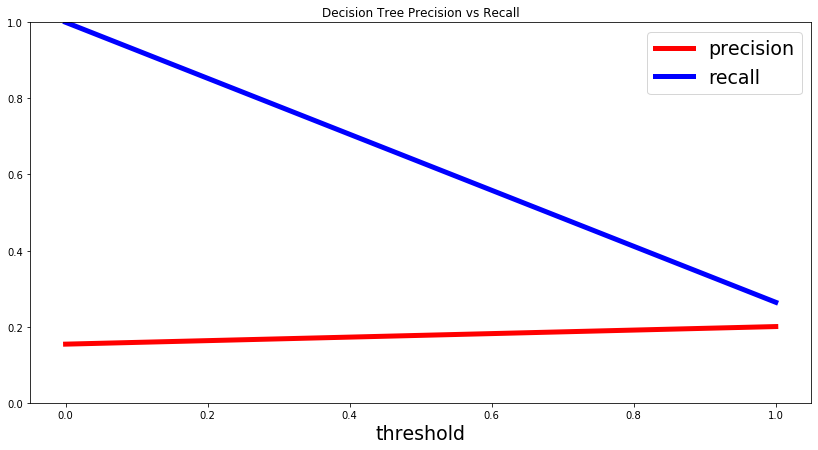

In [44]:
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])
    plt.title('Decision Tree Precision vs Recall')

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

- Dari grafik precision vs recall bisa dilihat bahwa berapapun thresholdnya nilai precision akan tetap dikisaran 0.2

In [41]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      2290
           1       0.26      0.20      0.23       584

    accuracy                           0.72      2874
   macro avg       0.54      0.53      0.53      2874
weighted avg       0.70      0.72      0.71      2874



- Dari classification report diatas dapat diambil kesimpunlan bahwa sensitivity sebesar 0.86 dan specificity sebesar 0.19